In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pandas as pd
df=pd.read_csv('/content/sample_data/data.csv')
df

,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780
...,...,...
1495,-8.527192,-6.726876
1496,-3.271435,2.243791
1497,1.649903,-0.201178
1498,0.792307,0.608689


In [ ]:
X = df[["x1", "x2"]].values
X

array([[ -6.11119721,   1.47153062],
       [ -7.49665361,   0.9134251 ],
       [-10.84489837,  -7.55352273],
       ...,
       [  1.64990343,  -0.20117787],
       [  0.79230661,   0.60868888],
       [  1.91226342,   0.25327399]])

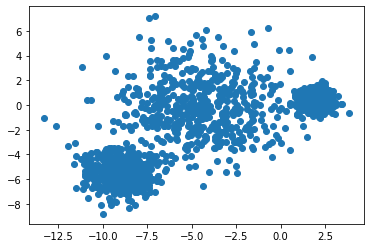

In [ ]:
# vẽ đồ thị trước khi dùng K-cluster
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

Sum of squared distances of samples to their closest cluster center:  5748.033947934027


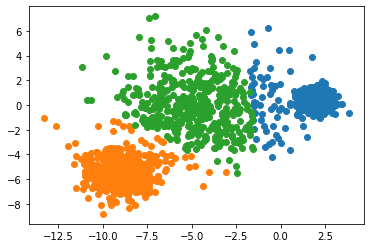

In [ ]:
# Result with Sklearn
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
    plt.scatter(X[:,0][clusters==ii], X[:,1][clusters==ii])
print("Sum of squared distances of samples to their closest cluster center: ", kmean.inertia_)

In [ ]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

In [ ]:
# khởi tạo tâm cụm bằng cách lấy ngẫu nhiên các điểm từ n phân cụm
def kmeans_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]
 

In [ ]:
# Xác định tâm cụm dựa vào khoảng cách Euclid
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

In [ ]:
# cập nhật lại vị trí các tâm cụm
#Việc tính toán lại tọa độ của mỗi tâm cụm được thực hiện đơn giản bằng cách lấy trung bình cộng tọa độ của tất cả các điểm dữ liệu của cụm.
#Sau khi tính toán xong, vị trí mới của tâm cụm sẽ nằm chính giữa cụm của nó.
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [ ]:
# kiểm tra tính hội tụ
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
 
  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()

In [ ]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[-8.05529403 -4.66667373]
 [-4.83038423 -1.74421916]
 [ 1.02568685  1.12095368]]


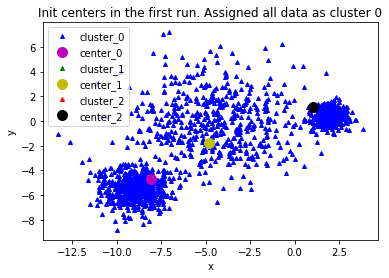

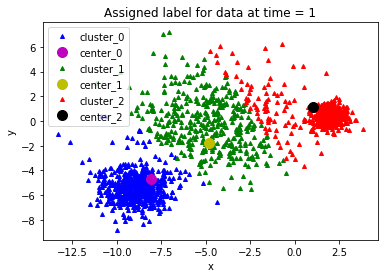

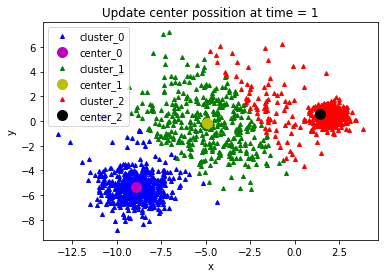

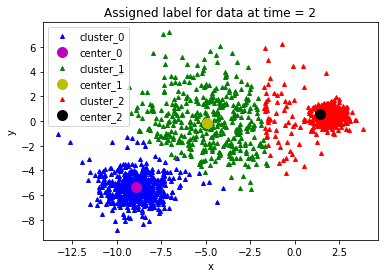

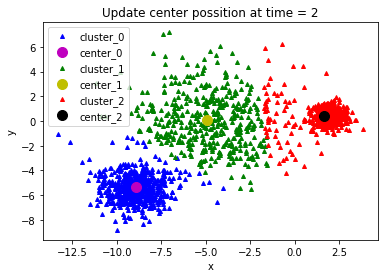

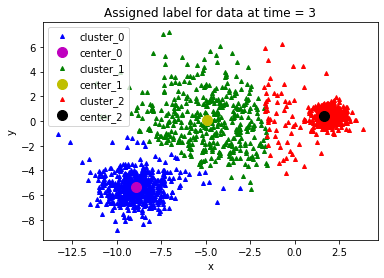

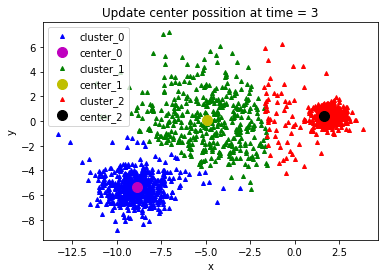

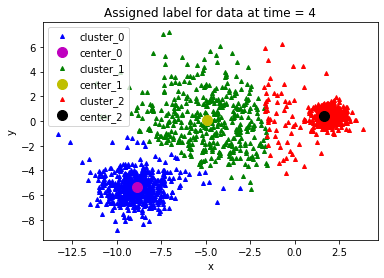

In [ ]:
n_cluster=3
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)